In [2]:
import pandas as pd
import sodapy as sd
import pandas_bokeh as pbk
pbk.output_notebook()
from bokeh.models import Legend
import matplotlib as mp

Loading BokehJS ...

In [3]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

from sodapy import Socrata

client = Socrata("analisi.transparenciacatalunya.cat", None)

results = client.get("rmgc-ncpb", limit=16774)

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)

In [4]:
# Tenim en la columnna 'dat' el dia i l'hora juntes, volem separar-les en dues noves columnes 'data' i 'hora'
dist_morts=df[["dat","f_morts"]]
dist_morts.head()

,dat,f_morts
0,2010-01-25T23:33:00.000,0
1,2010-10-31T01:00:00.000,0
2,2010-05-17T15:27:00.000,1
3,2010-08-21T22:30:00.000,0
4,2010-05-07T17:45:00.000,0


In [5]:
# Canviem la T que separa dia i hora per identificar la separació dues vegades: amb ' ' i amb '-'
df['dat'] = df['dat'].str.replace('T','  ')
df[['data','hora']] = df["dat"].str.split(" ", 1, expand=True)
df['data']=df['data'].astype("datetime64")
df["hora"] = df["hora"].str.strip("-")
df.head()

,any,zona,dat,via,pk,nommun,nomcom,nomdem,f_morts,f_ferits_greus,...,d_titularitat_via,d_tracat_altimetric,d_vent,grupdialab,hor,gruphor,tipacc,tipdia,data,hora
0,2010,Zona urbana,2010-01-25 23:33:00.000,SE,999999,CANOVES I SAMALUS,Valles Oriental,Barcelona,0,1,...,NA,NA,"Calma, vent molt suau",Feiners,2333,Nit,Col.lisió de vehicles en marxa,dill-dij,2010-01-25,23:33:00.000
1,2010,Carretera,2010-10-31 01:00:00.000,N-240,999,LLEIDA,Segria,Lleida,0,1,...,Estatal,Pla,"Calma, vent molt suau",CapDeSetmana,1,Nit,Sortida de la calcada sense especificar,dg,2010-10-31,01:00:00.000
2,2010,Carretera,2010-05-17 15:27:00.000,N-II,7087,FORNELLS DE LA SELVA,Girones,Girona,1,0,...,Estatal,Rampa o pendent,"Calma, vent molt suau",Feiners,1527,Tarda,Col.lisió de vehicles en marxa,dill-dij,2010-05-17,15:27:00.000
3,2010,Zona urbana,2010-08-21 22:30:00.000,SE,999999,BARCELONA,Barcelones,Barcelona,0,2,...,NA,NA,"Calma, vent molt suau",CapDeSetmana,223,Nit,Col.lisió de vehicles en marxa,dis,2010-08-21,22:30:00.000
4,2010,Zona urbana,2010-05-07 17:45:00.000,SE,999999,BADALONA,Barcelones,Barcelona,0,1,...,NA,NA,"Calma, vent molt suau",CapDeSetmana,1745,Tarda,Bolcada a la calcada,div,2010-05-07,17:45:00.000


In [6]:
type("dat")

str

In [7]:
# Ara ja podem trobar distribucions en funció del dia i de l'hora
dist_morts=df[["data","f_morts"]]
dist_morts.head()

,data,f_morts
0,2010-01-25,0
1,2010-10-31,0
2,2010-05-17,1
3,2010-08-21,0
4,2010-05-07,0


In [8]:
# Fem un subdataset dels morts que n'hi ha en els accidents que han ocorregut només en comarques de Barcelona
dist_morts_geograf=df[['nomdem','nomcom']]
dist_morts_geograf.set_index('nomdem', inplace=True)
dist_morts_geograf_barna=dist_morts_geograf.loc[['Barcelona']]
dist_morts_geograf_barna.head()

,nomcom
nomdem,
Barcelona,Valles Oriental
Barcelona,Barcelones
Barcelona,Barcelones
Barcelona,Barcelones
Barcelona,Barcelones


In [9]:
# Obtenim un diagrama de bescuit del nombre d'accidents que ocorre en cada comarca de Barcelona
# No tenim en compte ferits o morts perquè encara no sabem fer que es compten adequadament

p=dist_morts_geograf_barna.value_counts().plot_bokeh(kind='pie')
# Cal averiguar com posar titol i llegenda (canviar _x_values per 'Accidents')
# A més, hem de trobar el nombre d'accidents per no tindre quesitos que representen bàsicament la població de cada comarca

In [10]:
# Volem representar un histograma on es vegin la quantitat de morts cada any
# Després podríem fer un histograma combinat amb morts i ferits (amb els morts baix perquè és el més important)
morts_cat=df[["any","data","f_morts"]]
morts_cat=morts_cat.drop(index=morts_cat[morts_cat['f_morts']== '0'].index)
morts_cat.set_index("any", inplace=True)
morts_cat.head()

,data,f_morts
any,,
2010,2010-05-17,1
2010,2010-10-23,1
2010,2010-07-02,1
2010,2010-02-08,1
2010,2010-06-23,1


In [11]:
# Volem crear un dataframe amb el nombre de morts en accidents cada any

morts_cat10=morts_cat.loc[['2010']]
morts_cat11=morts_cat.loc[['2011']]
morts_cat12=morts_cat.loc[['2012']]
morts_cat13=morts_cat.loc[['2013']]
morts_cat14=morts_cat.loc[['2014']]
morts_cat15=morts_cat.loc[['2015']]
morts_cat16=morts_cat.loc[['2016']]
morts_cat17=morts_cat.loc[['2017']]
morts_cat18=morts_cat.loc[['2018']]
morts_10=morts_cat10.loc[:, 'f_morts'].sum()
morts_11=morts_cat11.loc[:, 'f_morts'].sum()
morts_12=morts_cat12.loc[:, 'f_morts'].sum()
morts_13=morts_cat13.loc[:, 'f_morts'].sum()
morts_14=morts_cat14.loc[:, 'f_morts'].sum()
morts_15=morts_cat15.loc[:, 'f_morts'].sum()
morts_16=morts_cat16.loc[:, 'f_morts'].sum()
morts_17=morts_cat17.loc[:, 'f_morts'].sum()
morts_18=morts_cat18.loc[:, 'f_morts'].sum()

def getSum(n):
    
    sum = 0
    for digit in str(n): 
      sum += int(digit)      
    return sum
   

print(getSum(morts_10),getSum(morts_11),getSum(morts_12),getSum(morts_13),getSum(morts_14),getSum(morts_15),getSum(morts_16),getSum(morts_17),getSum(morts_18))


339 280 274 232 230 261 222 240 260


In [12]:
mortsperanyscat=pd.DataFrame({"any":[2010,2011,2012,2013,2014,2015,2016,2017,2018],"morts":[339,280,274,232,230,261,222,240,260]})
mortsperanyscat

,any,morts
0,2010,339
1,2011,280
2,2012,274
3,2013,232
4,2014,230
5,2015,261
6,2016,222
7,2017,240
8,2018,260


In [13]:
# Scatter
mortsperanyscat.plot_bokeh(kind='scatter',x='any',y='morts',title='Morts en carretera per any')

Figure(id='1149', ...)

In [14]:
# Histograma
mortsperany=pd.DataFrame({"morts":[339,280,274,232,230,261,222,240,260]}, index=[2010,2011,2012,2013,2014,2015,2016,2017,2018])
mortsperany.plot_bokeh.bar(ylabel='Morts',title='Morts en carretera per any',alpha=0.6)

Figure(id='1310', ...)

In [15]:
# Fem un subdataset dels morts que n'hi ha en els accidents mortals que han ocorregut només en l'AP-7
dist_morts_via=df[['via','pk','nomcom','f_morts']]

dist_morts_via=dist_morts_via.drop(index=dist_morts_via[dist_morts_via['f_morts']== '0'].index)
dist_morts_via.set_index('via', inplace=True)
dist_morts_ap=dist_morts_via.loc[['AP-7']]
dist_morts_ap.head()

,pk,nomcom,f_morts
via,,,
AP-7,1715,Baix Llobregat,1
AP-7,3368,Montsia,1
AP-7,1175,Valles Oriental,1
AP-7,749,Selva,1
AP-7,96,Selva,1


<AxesSubplot:xlabel='pk', ylabel='f_morts'>

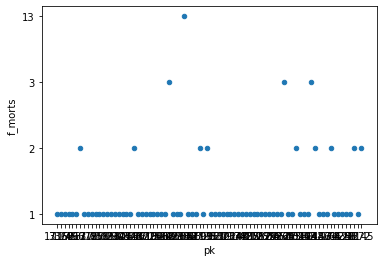

In [16]:
# Scatter, volem agrupar punts que pertanyen a intervals de per exemple 6 km (com en un histograma) per detectar punts negres
dist_morts_ap.plot.scatter(x='pk',y='f_morts')

df_poblacion = pd.read_excel("PoblacioComarques.xls")
df_poblacion

In [17]:
df_poblacion = pd.read_excel("PoblacioComarques.xls")
df_poblacion.head()

,comarca,pobl,pobl_percent
0,Barcelones,2239915,0.2969
1,Valles Occidental,915486,0.1214
2,Baix Llobregat,812146,0.1077
3,Maresme,442072,0.0586
4,Valles Oriental,405236,0.0537


In [18]:
# Volem ordenar alfabèticament el dataset de poblacions perquè coincideixi amb el dataset de geometries de cada comarca

df_poblacion=df_poblacion.sort_values('comarca')
df_poblacion=pd.DataFrame(df_poblacion).set_index('comarca')

df_poblacion.head()

,pobl,pobl_percent
comarca,,
Alt Camp,44168,0.0059
Alt Emporda,136981,0.0182
Alt Penedes,107724,0.0143
Alt Urgell,20201,0.0027
Alta Ribagorca,3813,0.0005


In [19]:
df_poblacion=df_poblacion.reset_index()
df_poblacion.head()

,comarca,pobl,pobl_percent
0,Alt Camp,44168,0.0059
1,Alt Emporda,136981,0.0182
2,Alt Penedes,107724,0.0143
3,Alt Urgell,20201,0.0027
4,Alta Ribagorca,3813,0.0005
